In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

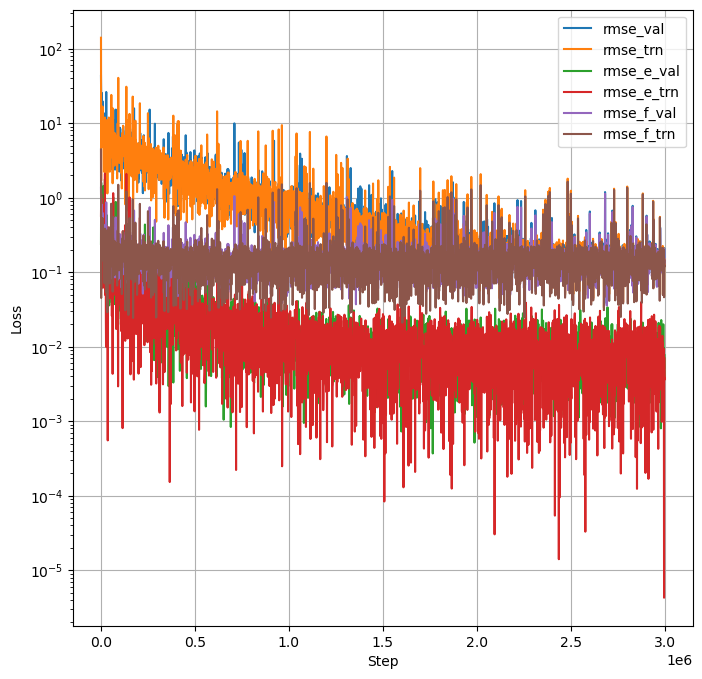

In [13]:
path2target = '/Users/y1u0d2/desktop/Lab/result/deepmd/Si/15'

data = np.genfromtxt(os.path.join(path2target, 'lcurve.out'), names=True)
plt.figure(figsize=(8,8))
for name in data.dtype.names[1:-1]:
    plt.plot(data['step'], data[name], label=name)
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
# plt.xscale('symlog')
plt.yscale('log')
plt.grid()
plt.show()

## Plot DFT vs Pred

In [3]:
def plot_obs_pred(obs, pred, title, unit):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)

    max_val = max(obs.max(), pred.max())
    min_val = min(obs.min(), pred.min())
    linspace = np.linspace(min_val, max_val, 10)

    ax.scatter(obs, pred)
    ax.plot(linspace, linspace)
    ax.set_title(title)
    ax.set_xlabel(f'DFT ({unit})')
    ax.set_ylabel(f'Predicted ({unit})')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    fig.show()

In [4]:
path2target = '/Users/y1u0d2/desktop/Lab/result/deepmd/Si/11'

e_result = np.loadtxt(os.path.join(path2target, 'test.e.out'), dtype=float, skiprows=1)

In [5]:
with open(os.path.join(path2target, 'test.e.out'), mode='r') as f:
    lines = [s.strip() for s in f.readlines()]
    columns = lines[0].split(' ')[2:]
    e_result = [l.split(' ') for l in lines[1:]]

e_result = np.array(e_result, dtype=float)
e_result_df = pd.DataFrame(data=e_result, columns=columns)
data_e = e_result_df['data_e']
pred_e = e_result_df['pred_e']

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_39231/1288601099.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


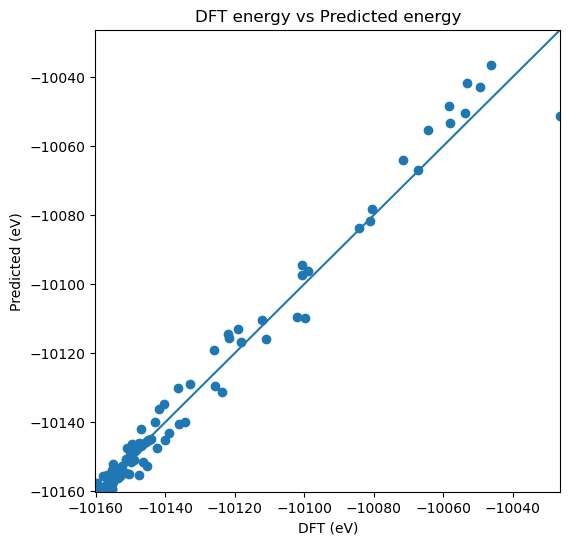

In [6]:
plot_obs_pred(
    data_e,
    pred_e,
    title='DFT energy vs Predicted energy',
    unit='eV'
    )

In [7]:
f_result = np.loadtxt(os.path.join(path2target, 'test.f.out'), dtype=float, skiprows=1)
with open(os.path.join(path2target, 'test.f.out'), mode='r') as f:
    lines = [s.strip() for s in f.readlines()]
    columns = lines[0].split(' ')[2:]
    f_result = [l.split(' ') for l in lines[1:]]

f_result = np.array(f_result, dtype=float)
f_result_df = pd.DataFrame(data=f_result, columns=columns)

data_f = np.concatenate([f_result_df['data_fx'].values, f_result_df['data_fy'].values, f_result_df['data_fz'].values], 0)
pred_f = np.concatenate([f_result_df['pred_fx'].values, f_result_df['pred_fy'].values, f_result_df['pred_fz'].values], 0)

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_39231/1288601099.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


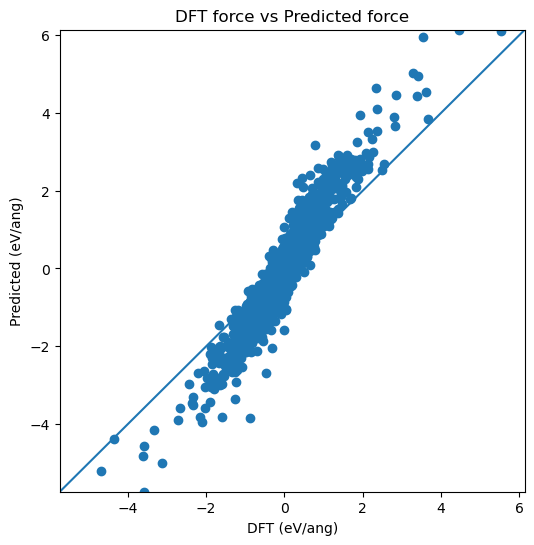

In [8]:
plot_obs_pred(
    data_f,
    pred_f,
    title='DFT force vs Predicted force',
    unit='eV/ang'
    )

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calc_score(obs, pred):
    score_dict = {}
    score_dict['MAE'] = mean_absolute_error(obs, pred)
    score_dict['RMSE'] = np.sqrt(mean_squared_error(obs, pred))
    score_dict['R2'] = r2_score(obs, pred)
    return score_dict

In [10]:
e_score_dict = calc_score(data_e, pred_e)
f_score_dict = calc_score(data_f, pred_f)

In [11]:
print(e_score_dict)
print(f_score_dict)

{'MAE': 3.2602225753293896, 'RMSE': 4.7632222189306965, 'R2': 0.9780966651868392}
{'MAE': 0.245363332217452, 'RMSE': 0.3783877223918071, 'R2': 0.389786326738384}
